In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
file_list = [("v000_%02d" % i) + '.jpg'  for i in [2,3,4,5,6,7]]
print file_list

['v000_02.jpg', 'v000_03.jpg', 'v000_04.jpg', 'v000_05.jpg', 'v000_06.jpg', 'v000_07.jpg']


In [5]:
img_list = map(lambda x : cv2.imread('../../../data/images/' + x), file_list)

In [6]:
img_list_gray = map(lambda x : cv2.cvtColor(x,cv2.COLOR_BGR2GRAY), img_list)

In [7]:
corners = map(lambda x : np.int0(cv2.goodFeaturesToTrack(x,100,0.01,10)), img_list_gray)
# We have up to 100 corners per image here (every corner - location in image)

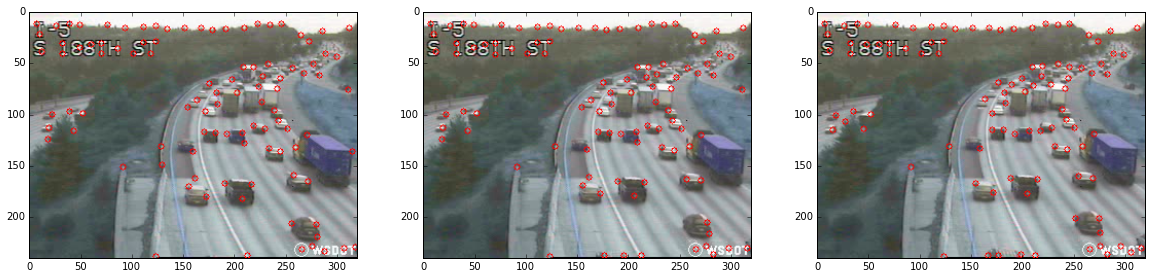

In [8]:
#Draw corners as cirles

plt.figure(figsize = (20,20))

for i in corners[0]:
    x,y = i.ravel()
    cv2.circle(img_list[0],(x,y),3, (255,0,0))   
plt.subplot(1, 3, 1)
plt.imshow(img_list[0])

for i in corners[1]:
    x,y = i.ravel()
    cv2.circle(img_list[1],(x,y),3, (255,0,0))
plt.subplot(1, 3, 2)
plt.imshow(img_list[1])

for i in corners[2]:
    x,y = i.ravel()
    cv2.circle(img_list[2],(x,y),3, (255,0,0))
plt.subplot(1, 3, 3)
plt.imshow(img_list[2])

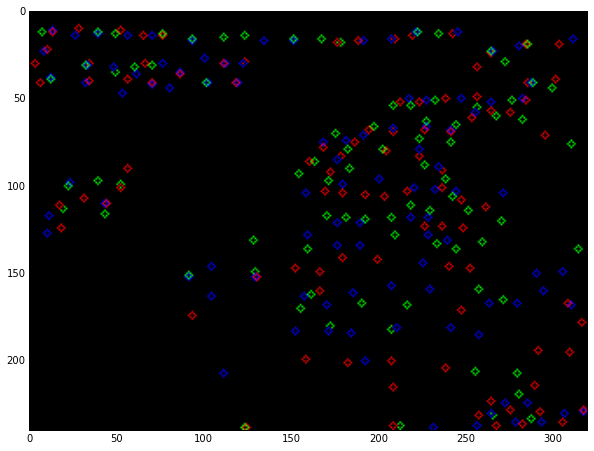

In [78]:
# Here we draw corners from 3 images on one plane
indx = [0,2,4]

img = np.zeros_like(img_list[0])

plt.figure(figsize = (10,10))

for i in corners[indx[0]]:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2, (0,255,0))

for i in corners[indx[1]]:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2, (255,0,0))    
    
for i in corners[indx[2]]:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2, (0,0,255))    
plt.imshow(img)

In [79]:
#%timeit corners = cv2.goodFeaturesToTrack(gray,100,0.1,10)

In [80]:
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).sum(-1).sum(1)

In [81]:
def corners_bin(corn, bin_sizes):
    corn = corn[:,0,:]
    st_feat = np.zeros_like(img_list_gray[0])
    for i in corn:
        st_feat[i[1],i[0]] = 1
    bins = rebin(st_feat, bin_sizes)    
    return bins.astype(int)    

In [82]:
print corners_bin(corners[0], (12,16))
print np.sum(corners_bin(corners[0], (12,16)))

[[1 2 1 1 1 1 2 1 2 1 1 2 1 0 1 1]
 [2 1 1 2 1 1 1 0 0 0 0 0 0 2 0 0]
 [0 1 0 1 0 2 0 0 0 0 2 1 1 1 2 0]
 [0 0 0 0 0 0 0 0 1 2 1 2 2 1 1 1]
 [0 1 1 0 0 0 0 1 2 1 0 2 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 2 2 1 2 0 0 0]
 [1 0 0 0 0 0 1 1 0 0 1 1 2 1 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 2 1 2]]
100


In [83]:
np.abs(corners_bin(corners[0], (12,16)) - corners_bin(corners[2], (12,16)))

array([[0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

In [86]:
file_list = ([("v000_%02d" % i) + '.jpg'  for i in range(2,50,1)] +
             [("v000_%02d" % i) + '.jpg'  for i in range(2,50,1)] +
             [("v000_%02d" % i) + '.jpg'  for i in range(2,50,1)])
#print file_list

In [87]:
img_list = map(lambda x : cv2.imread('../../../data/images/' + x), file_list)

In [10]:
print img_list

[array([[[232, 231, 240],
        [232, 231, 240],
        [232, 231, 241],
        ..., 
        [248, 250, 244],
        [248, 250, 244],
        [248, 251, 242]],

       [[229, 236, 233],
        [229, 236, 233],
        [229, 235, 234],
        ..., 
        [248, 248, 248],
        [248, 247, 249],
        [248, 247, 249]],

       [[229, 242, 228],
        [229, 242, 228],
        [231, 241, 229],
        ..., 
        [248, 247, 249],
        [248, 247, 251],
        [248, 247, 251]],

       ..., 
       [[ 63,  75,  81],
        [ 63,  75,  81],
        [ 63,  75,  81],
        ..., 
        [127, 126, 130],
        [120, 119, 123],
        [116, 115, 119]],

       [[ 62,  74,  80],
        [ 63,  75,  81],
        [ 63,  75,  81],
        ..., 
        [133, 132, 136],
        [129, 128, 132],
        [123, 122, 126]],

       [[ 62,  74,  80],
        [ 63,  75,  81],
        [ 63,  75,  81],
        ..., 
        [  0,   0,   4],
        [  0,   0,   3],
        [  0,   0

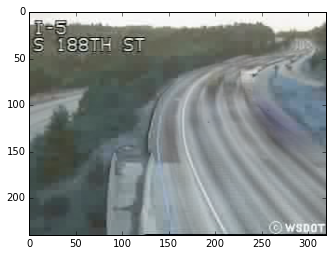

In [89]:
avr = (np.mean(img_list, axis = 0)).astype(np.uint8)
plt.imshow(avr)

In [90]:
avr_gray = cv2.cvtColor(avr,cv2.COLOR_BGR2GRAY)

In [91]:
avr_corners = np.int0(cv2.goodFeaturesToTrack(avr_gray,40,0.01,10))

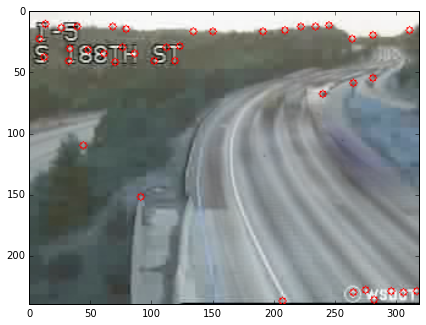

In [92]:
plt.figure(figsize = (7,7))

for i in avr_corners:
    x,y = i.ravel()
    cv2.circle(avr,(x,y),3, (255,0,0))   
plt.imshow(avr)

In [93]:
print corners_bin(avr_corners, (12,16))

[[1 2 0 2 0 0 1 1 0 1 1 2 1 0 0 1]
 [2 1 1 2 1 1 1 0 0 0 0 0 0 1 1 0]
 [0 1 0 1 0 2 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 2]]
